# Import Packages

In [1]:
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt

# Import Functions

In [2]:
import importlib.util
import os

def source_directory(directory_path):
    for filename in os.listdir(directory_path):
        if filename.endswith(".py"):
            # Define the module name and path
            module_name = filename[:-3]  # Remove the .py extension
            module_path = os.path.join(directory_path, filename)
            
            # Dynamically load the module
            spec = importlib.util.spec_from_file_location(module_name, module_path)
            module = importlib.util.module_from_spec(spec)
            spec.loader.exec_module(module)
            
            # Inject all functions and variables into the global namespace
            globals().update({name: getattr(module, name) for name in dir(module) if not name.startswith("__")})

# Example usage
source_directory("../functions")


In [3]:
source_directory("/Users/simondn/Documents/RashomonActiveLearning/Python/functions/Main")
source_directory("/Users/simondn/Documents/RashomonActiveLearning/Python/functions/Prediction")

## Input 

In [4]:
### Input ###
N= 1000
K = 1
TestProportion = 0.2
Seed = 1
CandidateProportion = 0.8

### Set Up ###
random.seed(Seed)
np.random.seed(Seed)
ErrorVec = []
SelectedObservationHistory = []

In [5]:
df = DataGeneratingProcess(N,K)
df_Train, df_Test, df_Candidate = TrainTestCandidateSplit(df, TestProportion, CandidateProportion)

## Passive Learning

In [6]:
for i in range(0,len(df_Candidate)):

    ### Prediction Model ###
    LinearRegressionModel = LinearRegressionFunction(df_Train)
    CurrentError = TestErrorFunction(LinearRegressionModel, df_Test)
    ErrorVec.append(CurrentError)

    ### Passive Sampling ###
    QueryObservation = df_Candidate.sample(n=1)
    SelectedObservationHistory.append(QueryObservation.index[0])
    df_Train = pd.concat([df_Train, QueryObservation])
    df_Candidate = df_Candidate.drop(QueryObservation.index)

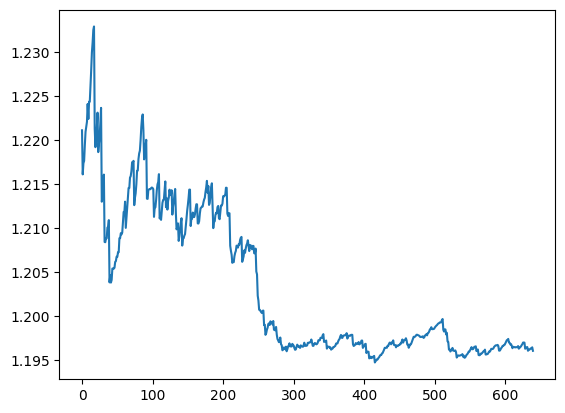

In [7]:
plt.plot(range(0,len(ErrorVec)), ErrorVec)